# Asignación de datos de demarcaciones territoriales para la validación del proceso de espacialización

El presente proceso tiene como objetivo incorporar un conjunto de columnas (variables) correspondientes a las demarcaciones territoriales con el fin de validar la correcta espacialización de los datos resultantes de un procedimiento de geocodificación.
<br><br>
Para ello se utiliza el Marco Geoestadístico 2024 del INEGI, disponible en:
https://www.inegi.org.mx/temas/mg/#descargas

<br><br>
La metodología consiste en asignar a la capa geocodificada las claves y nombres de localidad (cuando corresponda), municipio y entidad federativa. Estas columnas se comparan posteriormente con la información original para verificar la congruencia de los valores y confirmar o descartar su correspondencia territorial.


In [14]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

## Archivos para validación espacial

In [2]:
# Lectura de archivo 
localidad =  gpd.read_file("C:/Users/ALONSO/Documents/Datos/conjunto_de_datos/00l.shp")
municipio =  gpd.read_file("C:/Users/ALONSO/Documents/Datos/conjunto_de_datos/00mun.shp")

c:\Users\ALONSO\anaconda3\envs\gds\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [3]:
localidad.head(1)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,geometry
0,010010128,01,001,0128,El Cariñán,Rural,"POLYGON ((2461795.96 1097482.761, 2461834.059 ..."


In [4]:
municipio.head(1)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01005,01,005,Jesús María,"POLYGON ((2463657.764 1116053.82, 2463738.92 1..."


## Archivo a validar

In [5]:
# Lectura de archivo a validar
df = gpd.read_file("C:/Users/ALONSO/repositorios/instituciones_apeiron/datos/02_procesados/gpkg/instituciones_apeiron_02_analisis_basico_geocodificado.gpkg")
print(df.crs)
df.head(1)

EPSG:3857


,_id,institucionId,institucion,institucionPais,institucionTipoNivel_id,institucionTipoNivel_descripcion,institucionTipo_id,institucionTipo_descripcion,institucionEstado_id,institucionEstado_descripcion,dependienciaId,dependienciaNombre,dependienciaEstado_id,dependienciaEstado_descripcion,dependienciaPais,dependienciaTipoNivel_id,dependienciaTipoNivel_descripcion,subdependienciaNombre,subdependienciaId,subdependienciaEstado_id,subdependienciaEstado_descripcion,subdependienciaPais,subdependienciaTipoNivel_id,subdependienciaTipoNivel_descripcion,departamentoNombre,departamentoId,departamentoEstado_id,departamentoEstado_descripcion,departamentoTipoNivel_id,departamentoTipoNivel_descripcion,departamentoPais,has_dependencia,has_subdependencia,has_departamento,jerarquia_niveles,geocoding,layer,path,geometry
0,185414,185414,ZUMA Y ASOCIADOS,MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"ZUMA Y ASOCIADOS, MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (-11040701.227 2199098.007 0)


## Homologar sistemnas de coordenadas

In [6]:
print(localidad.crs)
print(municipio.crs)
print(df.crs)

EPSG:6372
EPSG:6372
EPSG:3857


In [7]:
# Cambiamos sistema de coordenadas 
df = df.to_crs(epsg=6372)
print(df.crs)

EPSG:6372


## Unión espacial

In [8]:
# Unión espacial
union = gpd.sjoin(
    df,
    localidad,
    how="left",
    predicate="intersects"
)
print(df.shape[0])
print(union.shape[0])
print(union['AMBITO'].value_counts())

union.head()

10444
10444
AMBITO
Urbana    9555
Rural      282
Name: count, dtype: int64


,_id,institucionId,institucion,institucionPais,institucionTipoNivel_id,institucionTipoNivel_descripcion,institucionTipo_id,institucionTipo_descripcion,institucionEstado_id,institucionEstado_descripcion,dependienciaId,dependienciaNombre,dependienciaEstado_id,dependienciaEstado_descripcion,dependienciaPais,dependienciaTipoNivel_id,dependienciaTipoNivel_descripcion,subdependienciaNombre,subdependienciaId,subdependienciaEstado_id,subdependienciaEstado_descripcion,subdependienciaPais,subdependienciaTipoNivel_id,subdependienciaTipoNivel_descripcion,departamentoNombre,departamentoId,departamentoEstado_id,departamentoEstado_descripcion,departamentoTipoNivel_id,departamentoTipoNivel_descripcion,departamentoPais,has_dependencia,has_subdependencia,has_departamento,jerarquia_niveles,geocoding,layer,path,geometry,index_right,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO
0,185414,185414,ZUMA Y ASOCIADOS,MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"ZUMA Y ASOCIADOS, MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2795357.443 822567.474 0),8334.0,090140001,09,014,0001,Benito Juárez,Urbana
1,195207,195207,"XECV ""LA GRAN COMPAÑIA""",MEXICO,2.0,PRIVADA,1,NACIONAL,24.0,SAN LUIS POTOSI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"XECV ""LA GRAN COMPAÑIA"", SAN LUIS POTOSI, MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2807642.393 1109651.765 0),36463.0,240130001,24,013,0001,Ciudad Valles,Urbana
2,199350,199350,"XANDER METALIC INDUSTRIAL SPECIALITIES, S.A. D...",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"XANDER METALIC INDUSTRIAL SPECIALITIES, S.A. D...",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2795598.153 849911.723 0),22340.0,151090003,15,109,0003,Buenavista,Urbana
3,239723,239723,"WIZELINE, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WIZELINE, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2796820.695 828415.584 0),8369.0,090150001,09,015,0001,Cuauhtémoc,Urbana
4,241910,241910,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2750711.762 807442.357 0),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
union['sit_territorial'] = np.where(
    union['AMBITO'] == 'Urbana', 'Localidad urbana',
    np.where(union['AMBITO'] == 'Rural', 'Localidad rural','Rural')
)
union.head()

,_id,institucionId,institucion,institucionPais,institucionTipoNivel_id,institucionTipoNivel_descripcion,institucionTipo_id,institucionTipo_descripcion,institucionEstado_id,institucionEstado_descripcion,dependienciaId,dependienciaNombre,dependienciaEstado_id,dependienciaEstado_descripcion,dependienciaPais,dependienciaTipoNivel_id,dependienciaTipoNivel_descripcion,subdependienciaNombre,subdependienciaId,subdependienciaEstado_id,subdependienciaEstado_descripcion,subdependienciaPais,subdependienciaTipoNivel_id,subdependienciaTipoNivel_descripcion,departamentoNombre,departamentoId,departamentoEstado_id,departamentoEstado_descripcion,departamentoTipoNivel_id,departamentoTipoNivel_descripcion,departamentoPais,has_dependencia,has_subdependencia,has_departamento,jerarquia_niveles,geocoding,layer,path,geometry,index_right,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,sit_territorial
0,185414,185414,ZUMA Y ASOCIADOS,MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"ZUMA Y ASOCIADOS, MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2795357.443 822567.474 0),8334.0,090140001,09,014,0001,Benito Juárez,Urbana,Localidad urbana
1,195207,195207,"XECV ""LA GRAN COMPAÑIA""",MEXICO,2.0,PRIVADA,1,NACIONAL,24.0,SAN LUIS POTOSI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"XECV ""LA GRAN COMPAÑIA"", SAN LUIS POTOSI, MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2807642.393 1109651.765 0),36463.0,240130001,24,013,0001,Ciudad Valles,Urbana,Localidad urbana
2,199350,199350,"XANDER METALIC INDUSTRIAL SPECIALITIES, S.A. D...",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"XANDER METALIC INDUSTRIAL SPECIALITIES, S.A. D...",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2795598.153 849911.723 0),22340.0,151090003,15,109,0003,Buenavista,Urbana,Localidad urbana
3,239723,239723,"WIZELINE, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WIZELINE, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2796820.695 828415.584 0),8369.0,090150001,09,015,0001,Cuauhtémoc,Urbana,Localidad urbana
4,241910,241910,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2750711.762 807442.357 0),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rural


In [10]:
union_cond = union[union['sit_territorial']=='Rural']
union_cond = union_cond.drop(columns=["index_right", "CVEGEO", "CVE_ENT", "CVE_MUN", "NOMGEO"], errors="ignore")
union_cond.head(1)

,_id,institucionId,institucion,institucionPais,institucionTipoNivel_id,institucionTipoNivel_descripcion,institucionTipo_id,institucionTipo_descripcion,institucionEstado_id,institucionEstado_descripcion,dependienciaId,dependienciaNombre,dependienciaEstado_id,dependienciaEstado_descripcion,dependienciaPais,dependienciaTipoNivel_id,dependienciaTipoNivel_descripcion,subdependienciaNombre,subdependienciaId,subdependienciaEstado_id,subdependienciaEstado_descripcion,subdependienciaPais,subdependienciaTipoNivel_id,subdependienciaTipoNivel_descripcion,departamentoNombre,departamentoId,departamentoEstado_id,departamentoEstado_descripcion,departamentoTipoNivel_id,departamentoTipoNivel_descripcion,departamentoPais,has_dependencia,has_subdependencia,has_departamento,jerarquia_niveles,geocoding,layer,path,geometry,CVE_LOC,AMBITO,sit_territorial
4,241910,241910,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2750711.762 807442.357 0),NaN,NaN,Rural


In [11]:
# Unión espacial
union_1 = gpd.sjoin(
    union_cond,
    municipio,
    how="left",
    predicate="intersects"
)
print(union_cond.shape[0])
print(union_1.shape[0])
print(union_1['AMBITO'].value_counts())

union_1.head()

607
607
Series([], Name: count, dtype: int64)


,_id,institucionId,institucion,institucionPais,institucionTipoNivel_id,institucionTipoNivel_descripcion,institucionTipo_id,institucionTipo_descripcion,institucionEstado_id,institucionEstado_descripcion,dependienciaId,dependienciaNombre,dependienciaEstado_id,dependienciaEstado_descripcion,dependienciaPais,dependienciaTipoNivel_id,dependienciaTipoNivel_descripcion,subdependienciaNombre,subdependienciaId,subdependienciaEstado_id,subdependienciaEstado_descripcion,subdependienciaPais,subdependienciaTipoNivel_id,subdependienciaTipoNivel_descripcion,departamentoNombre,departamentoId,departamentoEstado_id,departamentoEstado_descripcion,departamentoTipoNivel_id,departamentoTipoNivel_descripcion,departamentoPais,has_dependencia,has_subdependencia,has_departamento,jerarquia_niveles,geocoding,layer,path,geometry,CVE_LOC,AMBITO,sit_territorial,index_right,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO
4,241910,241910,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V.",MEXICO,2.0,PRIVADA,1,NACIONAL,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"WEMEX SUPERABRASIVOS, S. DE R.L. DE C.V., MEXICO",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2750711.762 807442.357 0),NaN,NaN,Rural,773.0,15054,15,054,Metepec
14,255877,255877,UNIVERSIDAD INTERCULTURAL DE CAMPECHE,MEXICO,1.0,PUBLICA,1,NACIONAL,4.0,CAMPECHE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,1,"UNIVERSIDAD INTERCULTURAL DE CAMPECHE, CAMPECH...",instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (3740855.374 977495.367 0),NaN,NaN,Rural,25.0,04013,04,013,Dzitbalché
17,223589,223589,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,MEXICO,1.0,PUBLICA,1,NACIONAL,16.0,MICHOACAN DE OCAMPO,90901,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,2,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2461923.161 947085.063 0),NaN,NaN,Rural,598.0,14016,14,016,Ayotlán
19,223589,223589,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,MEXICO,1.0,PUBLICA,1,NACIONAL,16.0,MICHOACAN DE OCAMPO,2000151,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,2,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (2153763.389 889767.762 0),NaN,NaN,Rural,585.0,14100,14,100,Tomatlán
20,223589,223589,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,MEXICO,1.0,PUBLICA,1,NACIONAL,16.0,MICHOACAN DE OCAMPO,2000283,0,26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,2,UNIVERSIDADES PARA EL BIENESTAR BENITO JUAREZ ...,instituciones_apeiron_02_analisis_basico_Geoco...,C:\Users\ALONSO\repositorios\instituciones_ape...,POINT Z (1785683.837 1736475.583 0),NaN,NaN,Rural,1949.0,26049,26,049,Quiriego


In [12]:
# Conservar los registros que no cumplían la condición
df_resultado = pd.concat([
    union_1,
    union[union["sit_territorial"] != "Rural"]
]).sort_index()
print(union.shape[0])
print(union[union["sit_territorial"] != "Rural"].shape[0])
print(union_1.shape[0])
print(df_resultado.shape[0])

10444
9837
607
10444


In [13]:
df_resultado['sit_territorial'].value_counts()

sit_territorial
Localidad urbana    9555
Rural                607
Localidad rural      282
Name: count, dtype: int64

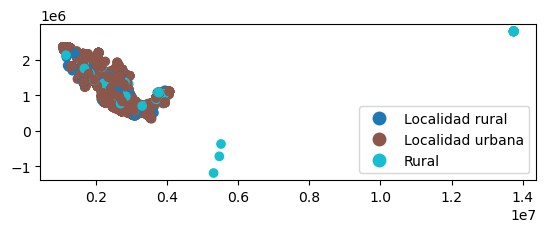

In [15]:
df_resultado.plot(column='sit_territorial', legend=True)
plt.show()



# Comparar columnas para validación